# IITM RL FINAL PROJECT

## Problem - bsuite 

This notebook uses an open source reinforcement learning benchmark known as bsuite. https://github.com/deepmind/bsuite

bsuite is a collection of carefully-designed experiments that investigate core capabilities of a reinforcement learning agent.

Your task is to use any reinforcement learning techniques at your disposal to get high scores on the environments specified.

**Note**: Since the course is on Reinforcement Learning,  please limit yourself to using traditional Reinforcement Learning algorithms, 

**Do not use deep reinforcement learning.**

# How to use this notebook? 📝

- This is a shared template and any edits you make here will not be saved. **You
should make a copy in your own drive**. Click the "File" menu (top-left), then "Save a Copy in Drive". You will be working in your copy however you like.

<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/notebook/aicrowd_notebook_submission_flow.png?inline=false" alt="notebook overview" style="width: 650px;"/></p>

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_RESULTS_DIR` | Path to write the output to.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#install-packages-) section to install the packages

In [ ]:
!pip install -q aicrowd-cli

     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 204kB 14.8MB/s 
     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 163kB 28.0MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


# AIcrowd Runtime Configuration 🧷

Get login API key from https://www.aicrowd.com/participants/me


In [ ]:
import os

AICROWD_RESULTS_DIR = os.getenv("OUTPUTS_DIR", "results")
os.environ["RESULTS_DIR"] = AICROWD_RESULTS_DIR
API_KEY = "59c601af636bb36118de9e7e3d936389"

In [ ]:
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


# Install packages 🗃

Please add all pacakage installations in this section

In [ ]:
!pip install git+http://gitlab.aicrowd.com/nimishsantosh107/bsuite.git
!pip install tabulate
!pip install tqdm

## Add any other installations you need here

  Cloning http://gitlab.aicrowd.com/nimishsantosh107/bsuite.git to /tmp/pip-req-build-eh29303c
  Running command git clone -q http://gitlab.aicrowd.com/nimishsantosh107/bsuite.git /tmp/pip-req-build-eh29303c
  Created wheel for bsuite: filename=bsuite-0.3.5-cp37-none-any.whl size=252043 sha256=f31f3a7bf838962e366c48bb8ba4442fed866a4d2683381d82e8dc364385e974
  Stored in directory: /tmp/pip-ephem-wheel-cache-nh55gfcj/wheels/61/ea/06/77c82c07765fb8608e50e6c66bc566fa6d113c725bc6937e7b
  Created wheel for frozendict: filename=frozendict-1.2-cp37-none-any.whl size=3150 sha256=0fd30916810650ade97decc3c446b9b5f9125096dac06dfd063acb1fc755df5f
  Stored in directory: /root/.cache/pip/wheels/6c/6c/e9/534386165bd12cf1885582c75eb6d0ffcb321b65c23fe0f834
Successfully built bsuite frozendict


# Import packages

In [ ]:
import gym
import warnings

import numpy as np
import pandas as pd
import plotnine as gg
from tqdm.notebook import tqdm

import bsuite
from bsuite.aicrowd import environments
from bsuite.aicrowd.runner import Runner
from bsuite.aicrowd.analysis import Analyzer

import itertools
import math

pd.options.mode.chained_assignment = None
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(3, 1), panel_spacing_x=0.5, panel_spacing_y=0.5)
warnings.filterwarnings('ignore')

# **Agent Class**

You can modify the AGENT TEMPLATE below and implement the logic of your agent. Your agent must implement a few methods that will be called by the `Runner` class.
* `__init__` - put any initialization code here.
* `get_action` - takes in a `state` and returns an `action`.
* `learn` - takes in `(state, action, reward, next_state)`, implements the learning logic.
* `get_state` - takes in a raw `observation` directly from the env, discretizes it and returns a `state`.

In addition to these, you may implement other methods which can be called by the above methods.

Since there are multiple environments, you may need unique hyper parameters for each environment. Instantiate the agent while passing in the hyper parameters in a dictionary using the `agent_config` parameter so that each environment can use different hyper parameters for the agent while using a single `Agent` class for all of them.  You can use any names for the keys in the config dictionary.   

An example `RandomAgent` is given below.

In [ ]:
# *** YOU CAN EDIT THIS CELL ***
# AGENT TEMPLATE
class Agent:
    def __init__(self, agent_config=None):

        self.config = agent_config

        self.action_size = self.config['env'].action_space.n
        self.env = self.config['env']
        self.gamma = 0.9
        self.n_samples = 10000

        self.Q = {}
        self.states = []

        if ('CATCH' in self.config['name']):
          self.epsilon = 0.1
          self.learning_rate = 0.6
          self.end_epsilon = self.epsilon
          self.end_learning_rate = 0.45
          self.exp_end_iter = 9000
        elif ('CARTPOLE' in self.config['name']):
          self.epsilon = 0.1
          self.learning_rate = .1
          self.end_epsilon = self.epsilon
          self.end_learning_rate = self.learning_rate
          self.exp_end_iter = 900
        else:
          self.epsilon = 0.1
          self.learning_rate = 1
          self.end_epsilon = self.epsilon
          self.end_learning_rate = self.learning_rate
          self.exp_end_iter = 900

        self.epsilon_decrement = ( self.epsilon - self.end_epsilon ) / self.exp_end_iter
        self.learning_rate_decrement = ( self.learning_rate - self.end_learning_rate ) / self.exp_end_iter

        if ('CATCH' in self.config['name']):
          self.catch_Q_Table_Init()
        else:
          self.cartpole_or_mountaincar_Q_Table_Init()

        pass

    def get_action(self, state):
        '''
        PARAMETERS  : 
            - state - discretized 'state'
        RETURNS     : 
            - action - 'action' to be taken
        '''

        if np.random.rand() <= self.epsilon:
          action =  np.random.choice(self.action_size)
        else:
          qVals = [self.Q[(state,act)] for act in range(self.action_size)]
          action = qVals.index(max(qVals))

        return action
    
    def learn(self, state, action, reward, next_state):
        '''
        PARAMETERS  : 
            - state - discretized 'state'
            - action - 'action' performed in 'state'
            - reward - 'reward' received due to action taken
            - next_state - discretized 'next_state'
        RETURNS     : 
            - NIL
        '''

        if (state == None) or (next_state == None):
          print(self.config['name'], "None Spotted")
          return

        next_q_values = [self.Q[(next_state,act)] for act in range(self.action_size)]
        target = reward + self.gamma * max(next_q_values)

        self.Q[(state,action)] += ( self.learning_rate * (target - self.Q[(state,action)]) )

        self.epsilon = max(self.end_epsilon, (self.epsilon - self.epsilon_decrement))
        self.learning_rate = max(self.end_learning_rate, (self.learning_rate - self.learning_rate_decrement))

    def get_state(self, observation):
        '''
        PARAMETERS  : 
            - observation - raw 'observation' from environment
        RETURNS     : 
            - state - discretized 'state' from raw 'observation'
        '''

        if ('CATCH' in self.config['name']):
          st = self.simplify_catch_state(observation)
          if st in self.states:
            state = st
          else:
            state = None
        else:
          state = self.transform_cartpole_or_mountaincar_state(self.simplify_cartpole_or_mountaincar_state(observation))

        return state

    def simplify_catch_state(self, observation):
      le = list(np.where((observation[:-1])==1))
      if len(le[0]) == 0:
        i = None
      else:
        i = le[0][0]
      if len(le[1]) == 0:
        j = None
      else:
        j = le[1][0]
      ne = list(np.where((observation[-1])==1))
      if len(ne[0]) == 0:
        k = 0
      else:
        k = ne[0][0]
      return (i,j,k)

    def catch_Q_Table_Init(self):

      print("Initialising Q-Table for Catch")

      done = False
      s = self.simplify_catch_state(self.env.reset())
      self.states.append(s)
      for _ in tqdm(range(self.n_samples)):
        a = np.random.choice(self.action_size)
        s2, _, done, _ = env.step(a)
        self.states.append(self.simplify_catch_state(s2))
        if done:
          s = self.simplify_catch_state(env.reset())
          self.states.append(s)

      for s in self.states:
        for a in range(self.action_size):
          self.Q[(s,a)] = np.random.randn()

      print("Initialised Q-Table for Catch")

    def simplify_cartpole_or_mountaincar_state(self, x):

      if ('CARTPOLE' in self.config['name']):
        x = x[0][:-1]
        x = [x[1],math.atan2(x[2],x[3]),x[4]]
      else:
        x = list(x[0][:-1])
      
      return x

    def transform_cartpole_or_mountaincar_state(self, state):
      x = []
      for d in range(self.D):
        x.append(int(np.digitize(state[d], self.bins[d])))
      return tuple(x)

    def cartpole_or_mountaincar_Q_Table_Init(self):

      print("Initialising Q-Table for Cartpole")

      n_bins = 6

      done = False
      s = self.simplify_cartpole_or_mountaincar_state(self.env.reset())
      self.D = len(s) # number of elements we need to bin
      self.states.append(s)
      for _ in tqdm(range(self.n_samples)):
        a = np.random.choice(self.action_size)
        s2, _, done, _ = self.env.step(a)
        self.states.append(self.simplify_cartpole_or_mountaincar_state(s2))
        if done:
          s = self.simplify_cartpole_or_mountaincar_state(self.env.reset())
          self.states.append(s)

      # convert to numpy array for easy indexing
      self.states = np.array(self.states)

      # create the bins for each dimension
      self.bins = []
      for d in range(self.D):
        column = np.sort(self.states[:,d])

        # find the boundaries for each bin
        current_bin = []
        for k in range(n_bins):
          boundary = column[int(self.n_samples / n_bins * (k + 0.5))]
          current_bin.append(boundary)

        self.bins.append(current_bin)

      list_of_bins = []
      for d in range(self.D):
        list_of_bins.append(list(range(len(self.bins[d]) + 1)))
      for s in itertools.product(*list_of_bins):
        for a in range(self.action_size):
          self.Q[(s,a)] = np.random.randn()

      print("Initialised Q-Table for Cartpole")

In [ ]:
class Agent_Lin_Approx:
    def __init__(self, agent_config=None):

        self.config = agent_config
        self.weight = None

        self.action_size = self.config['env'].action_space.n
        self.gamma = 0.9
        self.epsilon = 0.1
        self.learning_rate = 1e-1
        
        if ('MOUNTAINCAR' in self.config['name']) or ('CARTPOLE' in self.config['name']):
          self.weight = np.random.rand(1,(len(self.get_state(self.config['env'].reset()))+1))
        else:
          raise NotImplementedError

        pass

    def get_action(self, state):
        '''
        PARAMETERS  : 
            - state - discretized 'state'
        RETURNS     : 
            - action - 'action' to be taken
        '''

        if np.random.rand() <= self.epsilon:
          action =  np.random.choice(self.action_size)
        else:
          qVals = [np.matmul(self.weight,np.append(state,act))[0] for act in range(self.action_size)]
          action = qVals.index(max(qVals))

        return action
    
    def learn(self, state, action, reward, next_state):
        '''
        PARAMETERS  : 
            - state - discretized 'state'
            - action - 'action' performed in 'state'
            - reward - 'reward' received due to action taken
            - next_state - discretized 'next_state'
        RETURNS     : 
            - NIL
        '''

        if ('MOUNTAINCAR' in self.config['name']) or ('CARTPOLE' in self.config['name']):
          next_q_values = [np.matmul(self.weight,np.append(next_state,act))[0] for act in range(self.action_size)]
          target = reward + self.gamma * max(next_q_values)
          currQ = np.matmul(self.weight,np.append(state,action))[0]

          self.weight += ( self.learning_rate * (target - currQ) ) * np.array([np.append(state,action)])
        else:
          raise NotImplementedError

    def get_state(self, observation):
        '''
        PARAMETERS  : 
            - observation - raw 'observation' from environment
        RETURNS     : 
            - state - discretized 'state' from raw 'observation'
        '''

        if ('CARTPOLE' in self.config['name']):
          x = observation[0][:-1]
          state = np.array([x[1],math.atan2(x[2],x[3]),x[4]])
        elif ('MOUNTAINCAR' in self.config['name']):
          state = observation[0][:-1]
        else:
          raise NotImplementedError

        return state

In [ ]:
# *** YOU CAN EDIT THIS CELL ***
# DO NOT rename the config dictionaries as the evaluator references them. However, you may use any names for the keys in them.
catch_config = {'env':environments.load_env(environments.CATCH),'name':'CATCH'}
catch_noise_config = {'env':environments.load_env(environments.CATCH_NOISE),'name':'CATCH_NOISE'}
cartpole_config = {'env':environments.load_env(environments.CARTPOLE),'name':'CARTPOLE'}
cartpole_noise_config = {'env':environments.load_env(environments.CARTPOLE_NOISE),'name':'CARTPOLE_NOISE'}
mountaincar_config = {'env':environments.load_env(environments.MOUNTAINCAR),'name':'MOUNTAINCAR'}
mountaincar_noise_config = {'env':environments.load_env(environments.MOUNTAINCAR_NOISE),'name':'MOUNTAINCAR_NOISE'}

Loaded bsuite_id: catch/0.
Loaded bsuite_id: catch_noise/1.
Loaded bsuite_id: cartpole/0.
Loaded bsuite_id: cartpole_noise/1.
Loaded bsuite_id: mountain_car/0.
Loaded bsuite_id: mountain_car_noise/1.


In [ ]:
# *** YOU CAN EDIT THIS CELL ***
# EXAMPLE
class RandomAgent:
    def __init__(self, agent_config={}):
        self.config = agent_config

    def get_action(self, state):
        action = np.random.choice(2)
        return action
    
    def learn(self, state, action, reward, next_state):
        if ('BAR' in self.config):
            if (self.config['BAR']):
                self.config['FOO'] += 1

    def get_state(self, observation):
        state = observation
        return state

env1_config = {
    'FOO': 0.1,
    'BAR': True
}

env2_config = {
    'FOO': 0.2,
    'BAR': False
}

randomAgent1 = RandomAgent(agent_config=env1_config)
randomAgent2 = RandomAgent(agent_config=env2_config)

# **Playing with the Environment**

#### **Instantiating the environment** :
You can create an environment by calling the following function:  
`environments.load_env(ENV_ID)` - RETURNS: `env`  
where, ENV_ID can be ONE of the following:
* `environments.CATCH`
* `environments.CATCH_NOISE`
* `environments.CARTPOLE`
* `environments.CARTPOLE_NOISE`
* `environments.MOUNTAINCAR`
* `environments.MOUNTAINCAR_NOISE`

The `NOISE` environments add a scaled random noise to the `reward`.
<br/>

#### **Runnning the environment** :
There are certain methods required to run the environments. The interface is very similar to OpenAI Gym's interfaces. Fore more information, read the OpenAI documentation [here](https://gym.openai.com/docs/).

`env.reset()` - RETURNS: `observation`  
`env.step(action)`  - RETURNS: `(next_observation, reward, done, info[NOT USED])`

There are also a few useful properties within the environments:

* `env.action_space.n` - total number of possible actions. eg: if 'n' is 3, then the possible actions are `[0, 1, 2]`
* `env.observation_space.shape` -  the shape of the observation.
* `env.bsuite_num_episodes` -  the pre-specified number of episodes which will be run during evaluation (unique for each environment).

##### *ONLY IN CATCH / CATCH_NOISE*
* `env.observation_space.high` -  the upper limit for every index in the observation.
* `env.observation_space.low` -  the lower limit for every index of the observation.
<br/>


## **Environment Observation Space Limits:**

The limits for the observation space (minimum and maximum) for all the environments are given in the table below:

| Environments                        | Limits                                                                      |
|-------------------------------------|-----------------------------------------------------------------------------|
| CATCH <br/>  CATCH_NOISE            | MIN: use `env.observation_space.low` <br/> MAX: use `env.observation_space.high` |
| CARTPOLE <br/> CARTPOLE_NOISE       | MIN: `[-1. -5., -1., -1., -5., 0.]` <br/> MAX: `[ 1.,  5.,  1.,  1.,  5., 1.]` |
| MOUNTAINCAR <br/> MOUNTAINCAR_NOISE | MIN: `[-1.2, -0.07, 0.]` <br/> MAX: `[ 0.6,  0.07,  1.]`                                 |

[NOTE] Use this code cell to play around and get used to the environments. However, the `Runner` class below will be used to evaluate your agent.

In [ ]:
# *** YOU CAN EDIT THIS CELL ***
# TEST AREA
env = environments.load_env(environments.MOUNTAINCAR)  # replace 'environments.CARTPOLE' with other environments

agent = Agent(agent_config=mountaincar_config)                # replace with 'Agent()' to use your custom agent

NUM_EPISODES = 20000
rews = []                       # replace with 'env.bsuite_num_episodes' to run for pre-specified number of episodes0
for episode_n in tqdm(range(NUM_EPISODES)):
    done = False
    episode_reward = 0
    episode_moves = 0
 
    observation = env.reset()
    state = agent.get_state(observation)

    while not done:
        action = agent.get_action(state)

        next_observation, reward, done, _ = env.step(action)
        next_state = agent.get_state(next_observation)

        agent.learn(state, action, reward, next_state)

        state = next_state

        episode_reward += reward
        episode_moves += 1

    rews.append(episode_reward)

    if (((episode_n+1) % 1) == 0): 
        print("EPISODE: ",episode_n+1,"\tREWARD: ",episode_reward,"\tEPISODE_LENGTH: ",episode_moves)

Loaded bsuite_id: mountain_car/0.
Initialising Q-Table for Cartpole


  0%|          | 0/10000 [00:00<?, ?it/s]

Initialised Q-Table for Cartpole


  0%|          | 0/20000 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
EPISODE:  5147 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5148 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5149 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5150 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5151 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5152 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5153 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5154 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5155 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5156 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5157 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5158 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5159 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5160 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5161 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5162 	REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  5163 	REWARD:  -1000.0 	EPISODE_LENGTH:  10

KeyboardInterrupt: ignored

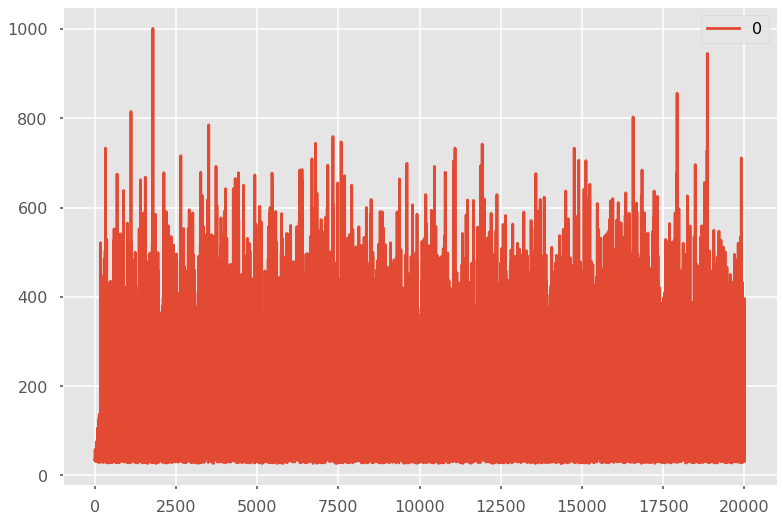

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole with only theta and lr = .1

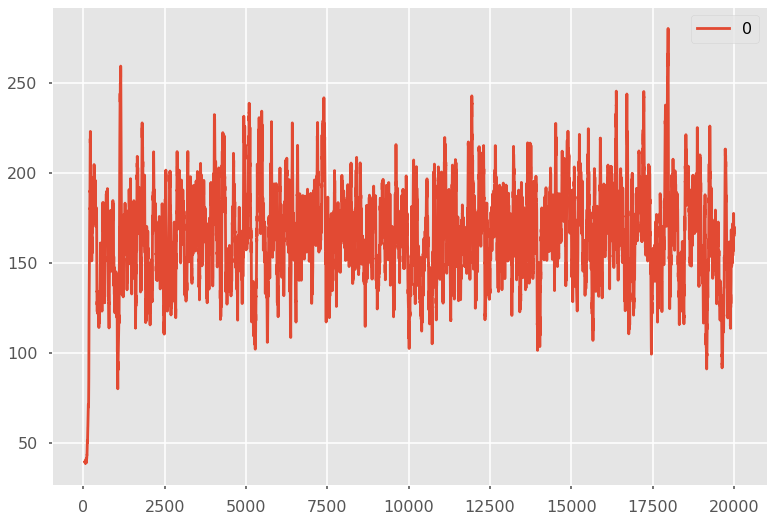

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole with only theta and lr = .1

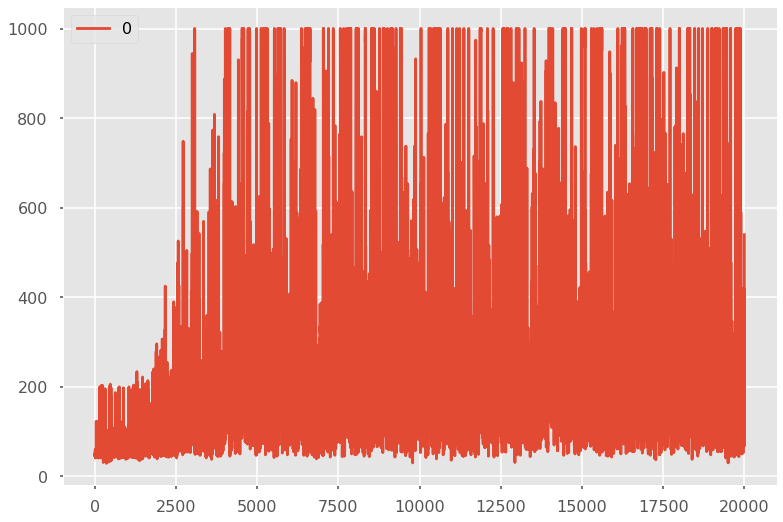

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole without time, x, xdot and lr = .1

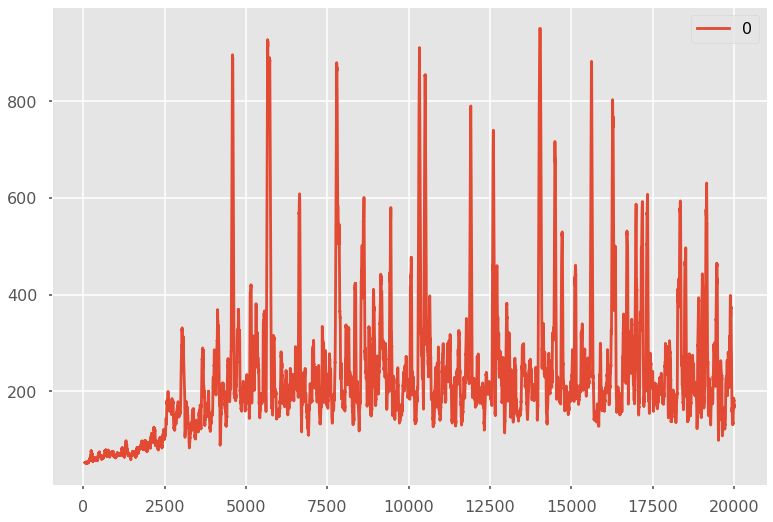

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole without time, x, xdot and lr = .1

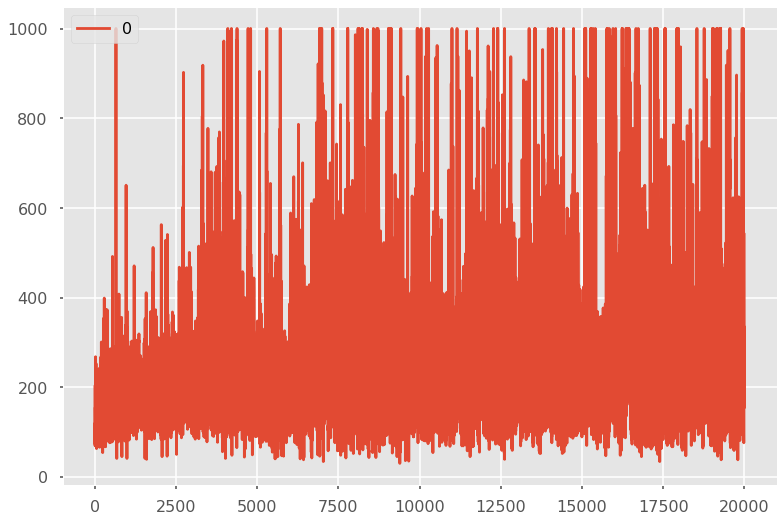

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole without time, x, thetadot and lr = .1

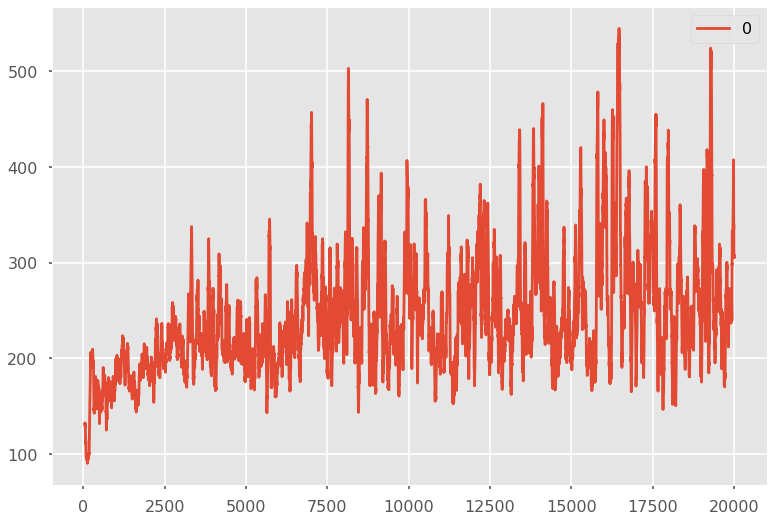

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole without time, x, thetadot and lr = .1

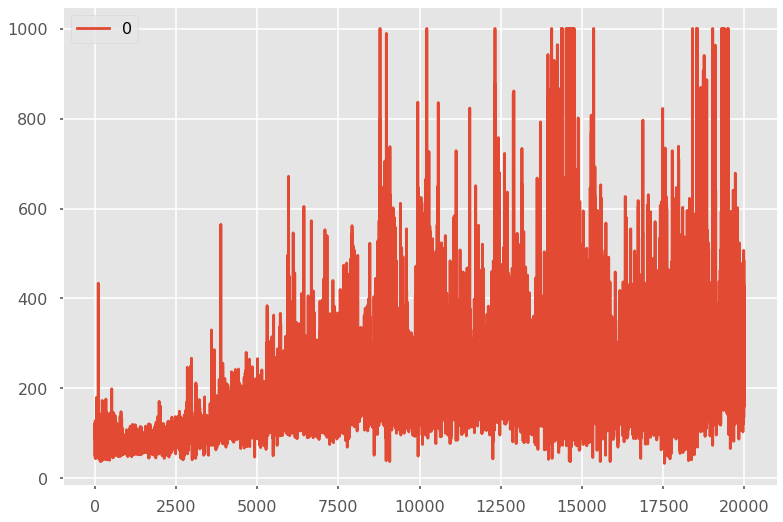

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole without time, x and lr = .1

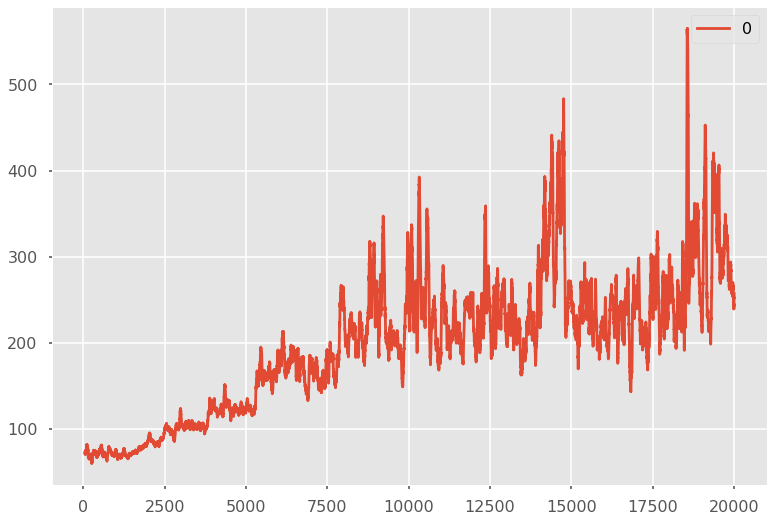

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole without time, x and lr = .1

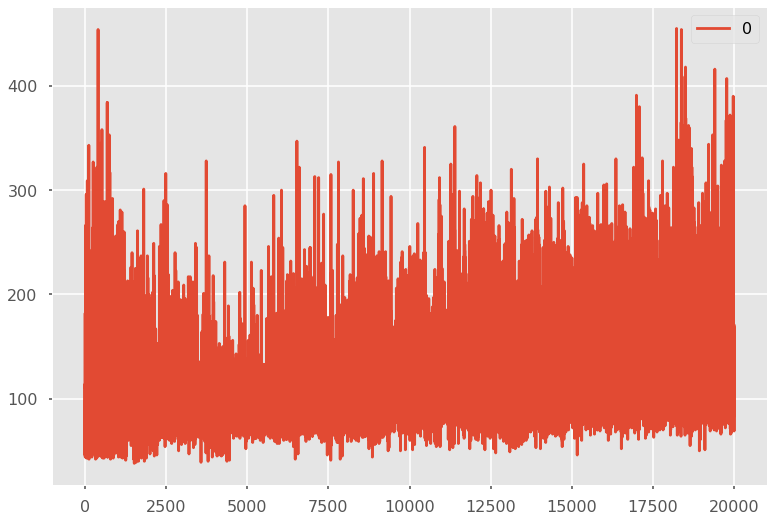

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole without time and lr = .1

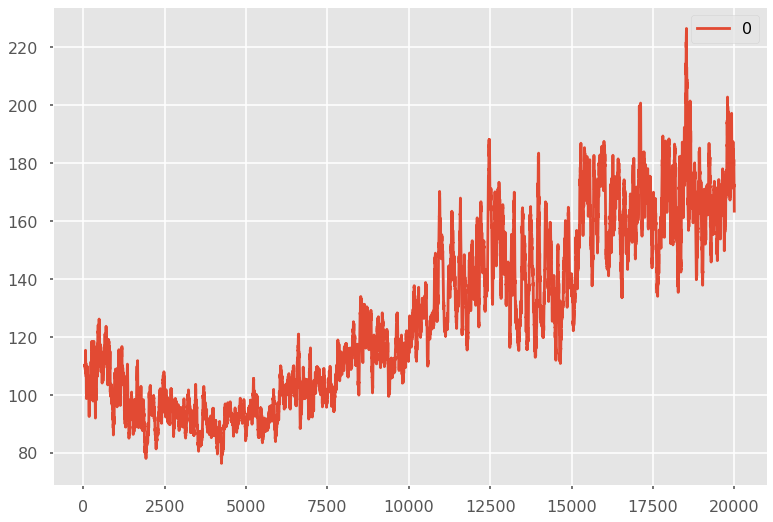

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole without time and lr = .1

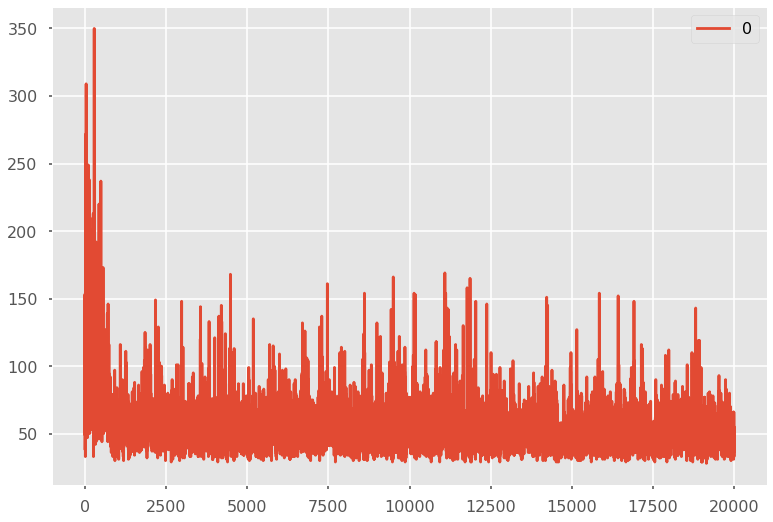

In [ ]:
import pandas as pd
pd.DataFrame(rews).plot() # Plot of Cartpole without time and lr = 1

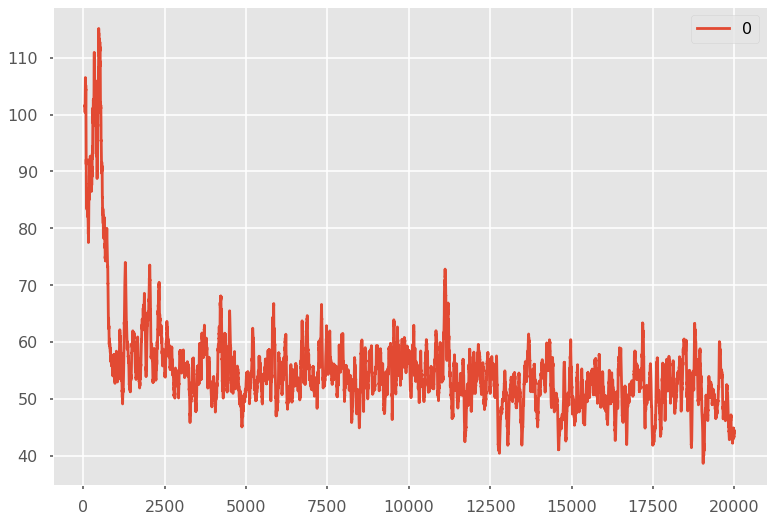

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Cartpole without time and lr = 1

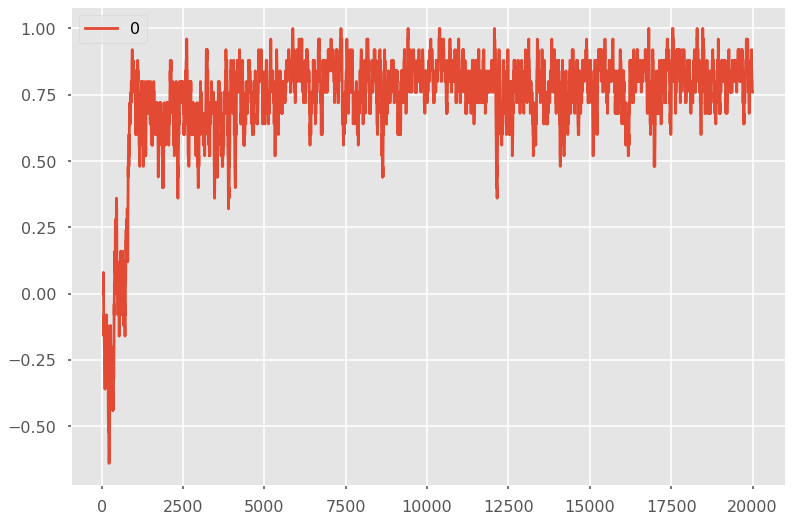

In [ ]:
import pandas as pd
pd.DataFrame(rews).rolling(50).mean().plot() # Mean Plot of Catch

## Point to the Agent Class you'll use for the final score

In [ ]:
RLAgent = Agent

# **Evaluating the Agent on all the Environments**

* The following cells will take care of running your agent on each environment and aggregating the results in csv files. In each of the following cells, the `agent_config` parameter is already set to use the corresponding config dictionary for that environment. DO NOT EDIT THIS.
* Feel free to modify the `LOG_INTERVAL` parameter to change the interval between episodes for logging.  
* Please do not modify any other contents in each of the cells.  

In [ ]:
LOG_INTERVAL = 100

In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=catch_config),
    env_id = environments.CATCH,
    log_interval = LOG_INTERVAL,
)
runner.play_episodes()

Loaded bsuite_id: catch/0.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/10000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  -1.0 	MEAN_REWARD:  -0.54 	EPISODE_LENGTH:  9
EPISODE:  200 	REWARD:  -1.0 	MEAN_REWARD:  -0.44 	EPISODE_LENGTH:  9
EPISODE:  300 	REWARD:  -1.0 	MEAN_REWARD:  -0.58 	EPISODE_LENGTH:  9
EPISODE:  400 	REWARD:  -1.0 	MEAN_REWARD:  -0.6 	EPISODE_LENGTH:  9
EPISODE:  500 	REWARD:  -1.0 	MEAN_REWARD:  -0.68 	EPISODE_LENGTH:  9
EPISODE:  600 	REWARD:  -1.0 	MEAN_REWARD:  -0.6 	EPISODE_LENGTH:  9
EPISODE:  700 	REWARD:  -1.0 	MEAN_REWARD:  -0.74 	EPISODE_LENGTH:  9
EPISODE:  800 	REWARD:  -1.0 	MEAN_REWARD:  -0.44 	EPISODE_LENGTH:  9
EPISODE:  900 	REWARD:  -1.0 	MEAN_REWARD:  -0.68 	EPISODE_LENGTH:  9
EPISODE:  1000 	REWARD:  -1.0 	MEAN_REWARD:  -0.6 	EPISODE_LENGTH:  9
EPISODE:  1100 	REWARD:  -1.0 	MEAN_REWARD:  -0.58 	EPISODE_LENGTH:  9
EPISODE:  1200 	REWARD:  -1.0 	MEAN_REWARD:  -0.6 	EPISODE_LENGTH:  9
EPISODE:  1300 	REWARD:  -1.0 	MEAN_REWARD:  -0.54 	EPISODE_LENGTH:  9
EPISODE:  1400 	REWARD:  1.0 	MEAN_REWARD:  -0.44 	EPISODE_LENGTH:  9
EPISODE:  1500 	REWA

In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=catch_noise_config),
    env_id = environments.CATCH_NOISE,
    log_interval = LOG_INTERVAL
)
runner.play_episodes()

Loaded bsuite_id: catch_noise/1.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/10000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  -2.4319180485080194 	MEAN_REWARD:  -0.51 	EPISODE_LENGTH:  9
EPISODE:  200 	REWARD:  0.8881949106608489 	MEAN_REWARD:  -0.46 	EPISODE_LENGTH:  9
EPISODE:  300 	REWARD:  -1.2941227075745902 	MEAN_REWARD:  -0.61 	EPISODE_LENGTH:  9
EPISODE:  400 	REWARD:  -1.4250488015594018 	MEAN_REWARD:  -0.62 	EPISODE_LENGTH:  9
EPISODE:  500 	REWARD:  -0.18346899641600334 	MEAN_REWARD:  -0.55 	EPISODE_LENGTH:  9
EPISODE:  600 	REWARD:  0.39936420173707576 	MEAN_REWARD:  -0.39 	EPISODE_LENGTH:  9
EPISODE:  700 	REWARD:  -0.6115223148558895 	MEAN_REWARD:  -0.71 	EPISODE_LENGTH:  9
EPISODE:  800 	REWARD:  1.8585504709523746 	MEAN_REWARD:  -0.68 	EPISODE_LENGTH:  9
EPISODE:  900 	REWARD:  -0.637721569542689 	MEAN_REWARD:  -0.79 	EPISODE_LENGTH:  9
EPISODE:  1000 	REWARD:  -0.1701424555746447 	MEAN_REWARD:  -0.59 	EPISODE_LENGTH:  9
EPISODE:  1100 	REWARD:  -2.373967525284758 	MEAN_REWARD:  -0.57 	EPISODE_LENGTH:  9
EPISODE:  1200 	REWARD:  0.9410664532715053 	MEAN_REWARD:  -0.64 	

In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=cartpole_config),
    env_id = environments.CARTPOLE,
    log_interval = LOG_INTERVAL
)
runner.play_episodes()

Loaded bsuite_id: cartpole/0.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/1000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  43.0 	MEAN_REWARD:  38.8 	EPISODE_LENGTH:  44
EPISODE:  200 	REWARD:  42.0 	MEAN_REWARD:  39.2 	EPISODE_LENGTH:  43
EPISODE:  300 	REWARD:  43.0 	MEAN_REWARD:  39.12 	EPISODE_LENGTH:  44
EPISODE:  400 	REWARD:  36.0 	MEAN_REWARD:  38.89 	EPISODE_LENGTH:  37
EPISODE:  500 	REWARD:  38.0 	MEAN_REWARD:  39.03 	EPISODE_LENGTH:  39
EPISODE:  600 	REWARD:  37.0 	MEAN_REWARD:  38.99 	EPISODE_LENGTH:  38
EPISODE:  700 	REWARD:  38.0 	MEAN_REWARD:  38.93 	EPISODE_LENGTH:  39
EPISODE:  800 	REWARD:  39.0 	MEAN_REWARD:  39.04 	EPISODE_LENGTH:  40
EPISODE:  900 	REWARD:  34.0 	MEAN_REWARD:  40.08 	EPISODE_LENGTH:  35
EPISODE:  1000 	REWARD:  41.0 	MEAN_REWARD:  39.67 	EPISODE_LENGTH:  42


In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=cartpole_noise_config),
    env_id = environments.CARTPOLE_NOISE,
    log_interval = LOG_INTERVAL
)
runner.play_episodes()

Loaded bsuite_id: cartpole_noise/1.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/1000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  34.12552152047825 	MEAN_REWARD:  39.68 	EPISODE_LENGTH:  35
EPISODE:  200 	REWARD:  36.32320904835952 	MEAN_REWARD:  38.88 	EPISODE_LENGTH:  38
EPISODE:  300 	REWARD:  33.397737840661364 	MEAN_REWARD:  38.5 	EPISODE_LENGTH:  35
EPISODE:  400 	REWARD:  41.031172901491644 	MEAN_REWARD:  39.16 	EPISODE_LENGTH:  41
EPISODE:  500 	REWARD:  46.569164491861926 	MEAN_REWARD:  38.75 	EPISODE_LENGTH:  49
EPISODE:  600 	REWARD:  42.98468397914839 	MEAN_REWARD:  38.32 	EPISODE_LENGTH:  42
EPISODE:  700 	REWARD:  33.621666763205525 	MEAN_REWARD:  39.46 	EPISODE_LENGTH:  37
EPISODE:  800 	REWARD:  37.587526593164725 	MEAN_REWARD:  39.72 	EPISODE_LENGTH:  39
EPISODE:  900 	REWARD:  36.790664408259225 	MEAN_REWARD:  39.14 	EPISODE_LENGTH:  37
EPISODE:  1000 	REWARD:  40.631988076325094 	MEAN_REWARD:  38.95 	EPISODE_LENGTH:  40


In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=mountaincar_config),
    env_id = environments.MOUNTAINCAR,
    log_interval = LOG_INTERVAL
)
runner.play_episodes()

Loaded bsuite_id: mountain_car/0.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/1000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  200 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  300 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  400 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  500 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  600 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  700 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  800 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  900 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000
EPISODE:  1000 	REWARD:  -1000.0 	MEAN_REWARD:  -1000.0 	EPISODE_LENGTH:  1000


In [ ]:
runner = Runner(
    agent = RLAgent(agent_config=mountaincar_noise_config),
    env_id = environments.MOUNTAINCAR_NOISE,
    log_interval = LOG_INTERVAL
)
runner.play_episodes()

Loaded bsuite_id: mountain_car_noise/1.
Logging results to CSV file for each bsuite_id in results.


  0%|          | 0/1000 [00:00<?, ?it/s]

EPISODE:  100 	REWARD:  -984.0074826301465 	MEAN_REWARD:  -998.95 	EPISODE_LENGTH:  1000
EPISODE:  200 	REWARD:  -1006.6954177370483 	MEAN_REWARD:  -999.26 	EPISODE_LENGTH:  1000
EPISODE:  300 	REWARD:  -999.4489016804749 	MEAN_REWARD:  -1000.41 	EPISODE_LENGTH:  1000
EPISODE:  400 	REWARD:  -1005.9196899050198 	MEAN_REWARD:  -1000.2 	EPISODE_LENGTH:  1000
EPISODE:  500 	REWARD:  -996.9460177617744 	MEAN_REWARD:  -1000.08 	EPISODE_LENGTH:  1000
EPISODE:  600 	REWARD:  -1005.6408451495033 	MEAN_REWARD:  -999.07 	EPISODE_LENGTH:  1000
EPISODE:  700 	REWARD:  -1002.8574841673754 	MEAN_REWARD:  -1000.17 	EPISODE_LENGTH:  1000
EPISODE:  800 	REWARD:  -1003.0486212221472 	MEAN_REWARD:  -999.14 	EPISODE_LENGTH:  1000
EPISODE:  900 	REWARD:  -1003.0506259195664 	MEAN_REWARD:  -1001.53 	EPISODE_LENGTH:  1000
EPISODE:  1000 	REWARD:  -992.5036966097842 	MEAN_REWARD:  -999.88 	EPISODE_LENGTH:  1000


# **Analysis & Result**

The following cells will show the score of the agent on each environment. The same scoring method will be used to evaluate your agent on a set of test environments.

In [ ]:
# *** PLEASE DONT EDIT THE CONTENTS OF THIS CELL ***
analyzer = Analyzer(os.environ.get('RESULTS_DIR'))
analyzer.print_scores()

╒════════════════════╤═══════════╕
│ ENVIRONMENT        │     SCORE │
╞════════════════════╪═══════════╡
│ catch              │ 0.00225   │
├────────────────────┼───────────┤
│ catch_noise        │ 0.00325   │
├────────────────────┼───────────┤
│ cartpole           │ 0.0195875 │
├────────────────────┼───────────┤
│ cartpole_noise     │ 0.019507  │
├────────────────────┼───────────┤
│ mountain_car       │ 0.1       │
├────────────────────┼───────────┤
│ mountain_car_noise │ 0.1       │
╘════════════════════╧═══════════╛


In [ ]:
# If you want a object to get the scores
analyzer.get_scores()

{'cartpole': 0.019587499999999976,
 'cartpole_noise': 0.019507000000000004,
 'catch': 0.0022500000000000298,
 'catch_noise': 0.0032500000000000584,
 'mountain_car': 0.1,
 'mountain_car_noise': 0.1}

# **Backend Evaluation**

THIS CODE WILL EVALUATE THE AGENT USING THE SPECIFIED CONFIGS FOR THE CORRESPONDING ENVIRONMENTS. DO NOT EDIT THE CONTENTS OF THIS CELL.

In [ ]:
## Do not edit this cell
if (os.environ.get('BACKEND_EVALUATOR') is not None):
    
    import backend_evaluator

    runs = {
        'catch': (
            backend_evaluator.CATCH, 
            catch_config),
        'catch_noise': (
            backend_evaluator.CATCH_NOISE, 
            catch_noise_config),
        'cartpole': (
            backend_evaluator.CARTPOLE, 
            cartpole_config),
        'cartpole_noise': (
            backend_evaluator.CARTPOLE_NOISE, 
            cartpole_noise_config),
        'mountaincar': (
            backend_evaluator.MOUNTAINCAR, 
            mountaincar_config),
        'mountaincar_noise': (
            backend_evaluator.MOUNTAINCAR_NOISE, 
            mountaincar_noise_config)
    }

    for run_name, run in runs.items():
        env_ids, config = run
        for env_id in env_ids:
            runner = Runner(env_id=env_id,
                            agent=RLAgent(agent_config=config),
                            verbose=False,
                            eval=True)
            runner.play_episodes()

# Submit to AIcrowd 🚀

**NOTE: PLEASE SAVE THE NOTEBOOK BEFORE SUBMITTING IT (Ctrl + S)**

In [ ]:
! aicrowd notebook submit --no-verify -c iitm-rl-final-project -a assets